# PiML Toolbox: High-code Demo for TaiwanCredit Data

This example notebook demonstrates how to use PiML with its high-code APIs for the TaiwanCredit data from UCI repository, which consists of 30,000 credit card clients in Taiwan from 200504 to 200509; see details [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). The data can be loaded from PiML and it is subject to slight preprocessing. 

The response `FlagDefault` is binary and it is a classification problem.

# Stage 0: Install PiML package on Google Colab

1. Run `!pip install piml` to install the latest version of PiML. It requires V0.2 or above to use high-code APIs.
2. In Colab, you'll need restart the runtime in order to use newly installed PiML version.

In [1]:
!pip install piml

In [2]:
from piml import Experiment
exp = Experiment(highcode_only=True)

# Stage 1: Initialize an experiment, Load and Prepare data

In [3]:
exp.data_loader(data='TaiwanCredit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FlagDefault
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,0.0,0.0,3.592621,3.491782,2.838849,0.000000,0.000000,0.000000,0.000000,2.838849,0.000000,0.000000,0.000000,0.000000,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,3.428621,3.237041,3.428621,3.514946,3.538574,3.513484,0.000000,3.000434,3.000434,3.000434,0.000000,3.301247,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,4.465977,4.146996,4.132260,4.156307,4.174612,4.191731,3.181558,3.176381,3.000434,3.000434,3.000434,3.699057,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.672015,4.683353,4.692776,4.452016,4.461799,4.470528,3.301247,3.305351,3.079543,3.041787,3.029384,3.000434,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,3.935406,3.753660,4.554319,4.320997,4.282101,4.281760,3.301247,4.564453,4.000043,3.954291,2.838849,2.832509,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,5.276345,5.285143,5.318827,4.944507,4.494683,4.203604,3.929470,4.301052,3.699317,3.484015,3.699057,3.000434,0.0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,3.226342,3.262214,3.544440,3.953276,3.715251,0.000000,3.264345,3.547405,3.954194,2.113943,0.000000,0.000000,0.0
29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3.552181,3.525951,3.440752,4.319710,4.313509,4.286861,0.000000,0.000000,4.342442,3.623353,3.301247,3.491502,1.0
29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-3.216430,4.894205,4.882553,4.722428,4.073938,4.689708,4.933998,3.532754,3.071514,3.284882,4.723989,3.256477,1.0


In [4]:
# Use only payment history attributes: Pay_1~6, BILL_AMT1~6 and PAY_AMT1~6 (i.e., exclude all others); Keep the response `FlagDefault`
exp.data_summary(feature_exclude=["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"], feature_type={})

HTML(value='Data Shape:(30000, 24)')

In [5]:
exp.data_prepare(target='FlagDefault', task_type='classification', test_ratio=0.2, random_state=0)

,Config,Value
0,Excluded columns,"[LIMIT_BAL, MARRIAGE, SEX, AGE, EDUCATION]"
1,Target variable,FlagDefault
2,Sample weight,None
3,Task type,Classification
4,Split method,Random
5,Test ratio,0.2
6,Random state,0
7,Train test energy distance,0.000232


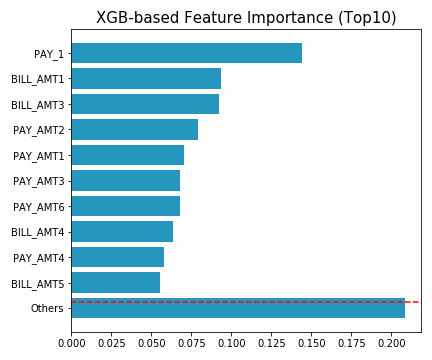

In [6]:
exp.feature_select(method="pfi", threshold=0.9, figsize=(6, 5))

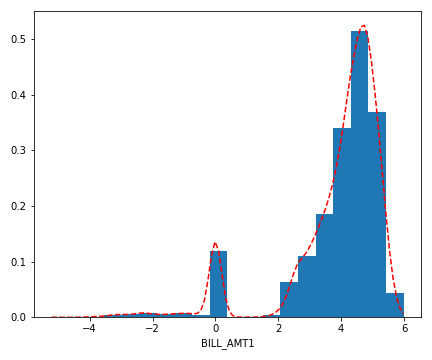

In [7]:
exp.eda(show='univariate', uni_feature='BILL_AMT1', figsize=(6, 5))

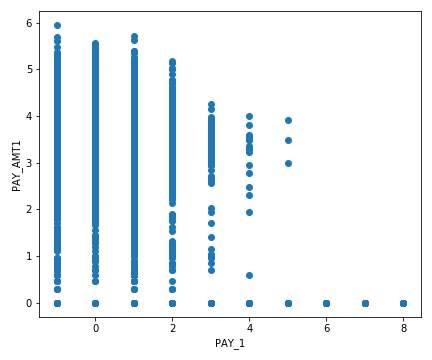

In [8]:
exp.eda(show='bivariate', bi_features=['PAY_1', 'PAY_AMT1'], figsize=(6, 5))

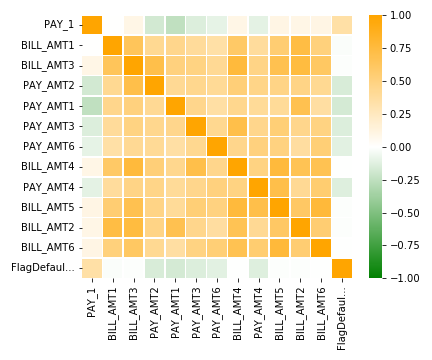

In [9]:
exp.eda(show='multivariate', multi_type='correlation_heatmap', figsize=(6, 5))

# Stage 2. Train intepretable models 

In [10]:
## ReLU-DNN: ReLU Deep Neural Networks with L1-Regularization, e.g. L1_reg = 0.0008
from piml.models import ReluDNNClassifier

clf1 = ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=0.0008,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf1, name='ReLU-DNN')
exp.model_diagnose(model="ReLU-DNN", show='accuracy_table')

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8126,0.7428,0.3207,0.6628,0.4322
Test,0.8233,0.7407,0.3269,0.6939,0.4444
Gap,0.0108,-0.0021,0.0062,0.0311,0.0122


In [11]:
## GAMI-Net: GAM-Neural Networks with Structured Interactions
from piml.models import GAMINetClassifier

clf2 = GAMINetClassifier(interact_num=10, loss_threshold=0.01,  
                        subnet_size_main_effect=[20], 
                        subnet_size_interaction=[20, 20])
exp.model_train(model=clf2, name='GAMI-Net')
exp.model_diagnose(model="GAMI-Net", show='accuracy_table')

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8168,0.7666,0.3362,0.6779,0.4495
Test,0.8315,0.7679,0.3531,0.7270,0.4754
Gap,0.0147,0.0013,0.0169,0.0491,0.0259


In [12]:
## EBM: Explainable Boosting Machine from MS Research
from piml.models import ExplainableBoostingClassifier

clf3 = ExplainableBoostingClassifier(interactions=10, random_state=0)
exp.model_train(model=clf3, name='EBM')
exp.model_diagnose(model="EBM", show='accuracy_table')

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8198,0.7809,0.3407,0.6932,0.4569
Test,0.8308,0.7693,0.3577,0.7183,0.4776
Gap,0.0110,-0.0116,0.0170,0.0250,0.0207


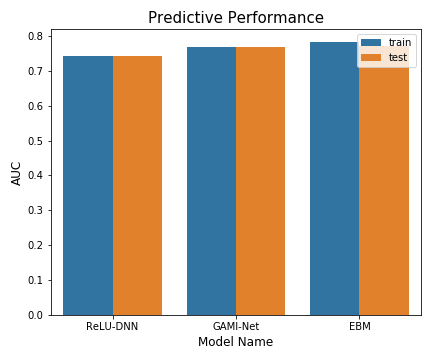

In [13]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='accuracy_plot', metric="AUC", figsize=(6, 5))

# Stage 3. Explain and Interpret

## Post-hoc Explaination: Global and Local Methods

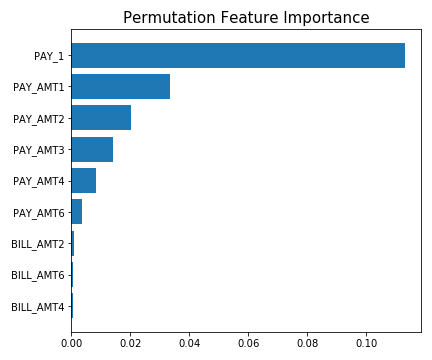

In [14]:
exp.model_explain(model='ReLU-DNN', show='pfi', figsize=(6, 5))

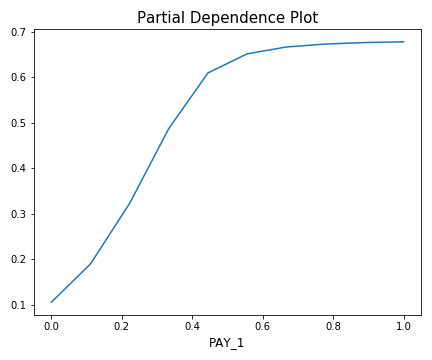

In [15]:
exp.model_explain(model='ReLU-DNN', show='pdp', uni_feature='PAY_1', figsize=(6, 5))

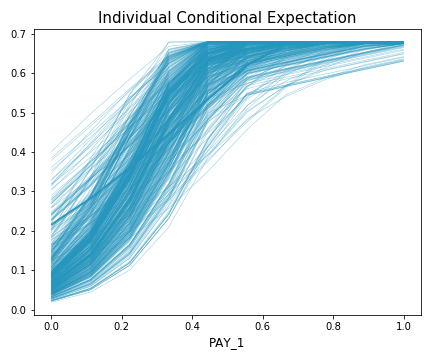

In [16]:
exp.model_explain(model='ReLU-DNN', show='ice', uni_feature="PAY_1", figsize=(6, 5))

Exact explainer: 21it [00:21,  1.06s/it]                                                                               


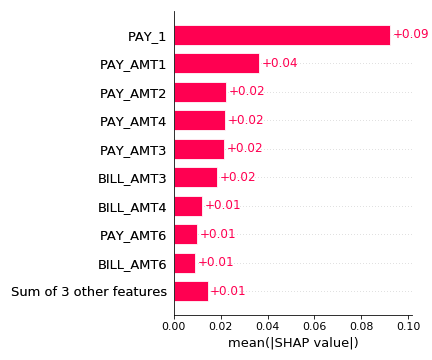

In [17]:
exp.model_explain(model='ReLU-DNN', show='shap_fi', sample_size=20, figsize=(6, 5))

Exact explainer: 21it [00:10, 10.03s/it]                                                                               


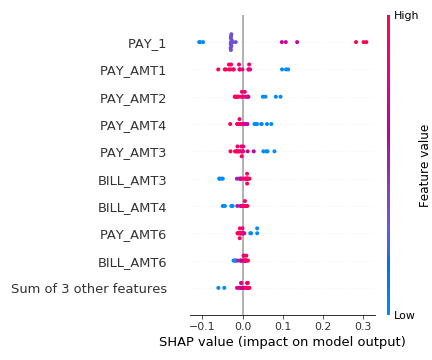

In [18]:
exp.model_explain(model='ReLU-DNN', show='shap_summary', sample_size=20, figsize=(6, 5))

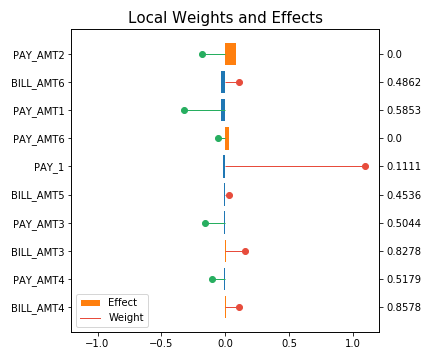

In [19]:
exp.model_explain(model='ReLU-DNN', show='lime', sample_id=0, figsize=(6, 5))

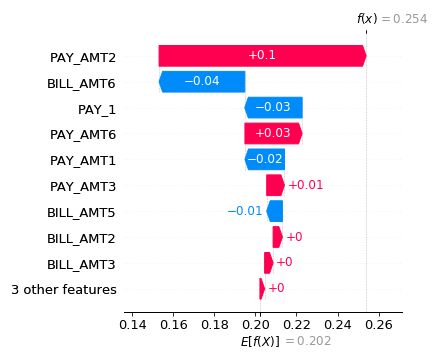

In [20]:
exp.model_explain(model='ReLU-DNN', show='shap_waterfall', sample_id=0, figsize=(6, 5))

## Inherent Interpretation: Global and Local Methods

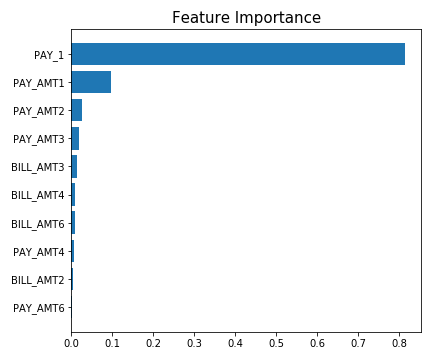

In [21]:
exp.model_interpret(model='ReLU-DNN', show='global_fi', figsize=(6, 5))

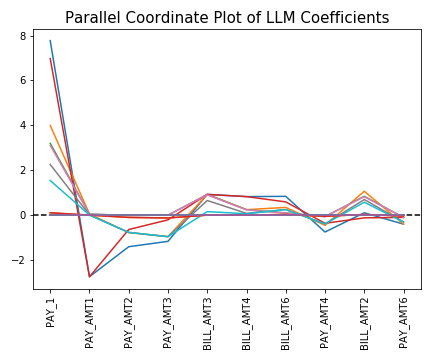

In [22]:
exp.model_interpret(model='ReLU-DNN', show='llm_pc', figsize=(6, 5))

In [23]:
exp.model_interpret(model='ReLU-DNN', show='llm_summary', figsize=(6, 5))

,Count,Response Mean,Response Std,Local AUC,Global AUC
0,17049.0,0.1572,0.3640,0.6681,0.7282
1,2515.0,0.3773,0.4848,0.7259,0.7185
2,2495.0,0.4016,0.4903,0.6941,0.6493
3,1583.0,0.2849,0.4515,0.7001,0.7210
4,117.0,0.5983,0.4924,0.4669,0.5526
5,94.0,0.8191,0.3870,0.3816,0.6391
6,33.0,0.7879,0.4151,0.6044,0.6491
7,28.0,0.6429,0.4880,0.4556,0.7204
8,21.0,0.7143,0.4629,0.5111,0.6416
9,19.0,0.6842,0.4776,0.6923,0.7090


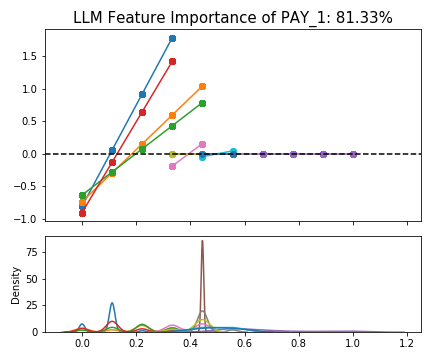

In [24]:
exp.model_interpret(model='ReLU-DNN', show='global_effect_plot', uni_feature='PAY_1', figsize=(6, 5))

In [25]:
exp.model_interpret(model='ReLU-DNN', show='global_effect_plot', 
                    bi_features=['PAY_1', 'PAY_2'], figsize=(6, 5))

'The value of "bi_features" should in [\'PAY_1\', \'BILL_AMT1\', \'BILL_AMT3\', \'PAY_AMT2\', \'PAY_AMT1\', \'PAY_AMT3\', \'PAY_AMT6\', \'BILL_AMT4\', \'PAY_AMT4\', \'BILL_AMT5\', \'BILL_AMT2\', \'BILL_AMT6\']'

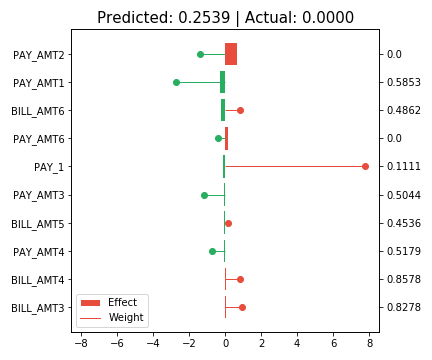

In [26]:
exp.model_interpret(model='ReLU-DNN', show='local_fi', sample_id=0, figsize=(6, 5))

# Stage 4. Diagnose and Compare

In [27]:
exp.model_diagnose(model='ReLU-DNN', show='accuracy_table')

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8126,0.7428,0.3207,0.6628,0.4322
Test,0.8233,0.7407,0.3269,0.6939,0.4444
Gap,0.0108,-0.0021,0.0062,0.0311,0.0122


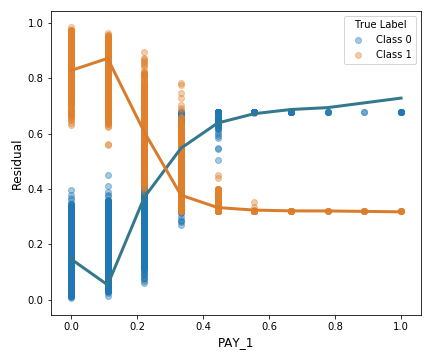

In [28]:
exp.model_diagnose(model='ReLU-DNN', show='accuracy_residual', show_feature='PAY_1', figsize=(6, 5))

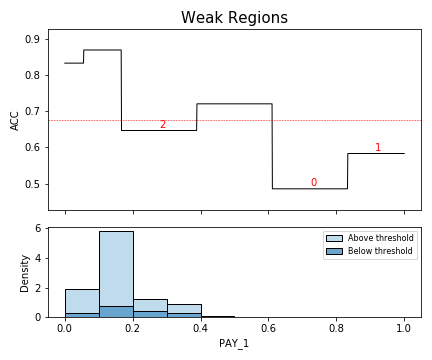

In [29]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot', slice_features=['PAY_1'], 
                   slice_method='tree', threshold=1.2, min_samples=20, figsize=(6, 5))

In [30]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot', slice_features=['PAY_1', 'PAY_2'], 
                   slice_method='tree', threshold=1.2, min_samples=20, figsize=(6, 5))

'The value of "slice_features" should in [\'PAY_1\', \'BILL_AMT1\', \'BILL_AMT3\', \'PAY_AMT2\', \'PAY_AMT1\', \'PAY_AMT3\', \'PAY_AMT6\', \'BILL_AMT4\', \'PAY_AMT4\', \'BILL_AMT5\', \'BILL_AMT2\', \'BILL_AMT6\']'

In [31]:
exp.model_diagnose(model='ReLU-DNN', show='weakspot', slice_features=['PAY_1', 'PAY_2'], 
                   slice_method='tree', threshold=1.2, min_samples=20, figsize=(6, 5))

'The value of "slice_features" should in [\'PAY_1\', \'BILL_AMT1\', \'BILL_AMT3\', \'PAY_AMT2\', \'PAY_AMT1\', \'PAY_AMT3\', \'PAY_AMT6\', \'BILL_AMT4\', \'PAY_AMT4\', \'BILL_AMT5\', \'BILL_AMT2\', \'BILL_AMT6\']'

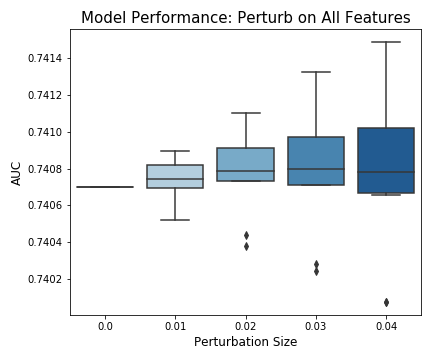

In [32]:
exp.model_diagnose(model='ReLU-DNN', show='robustness_perf', perturb_size=0.01, figsize=(6, 5))

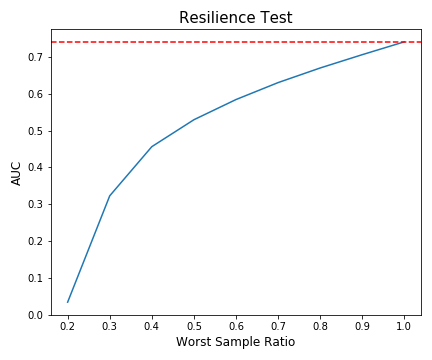

In [33]:
exp.model_diagnose(model='ReLU-DNN', show='resilience_perf', figsize=(6, 5))

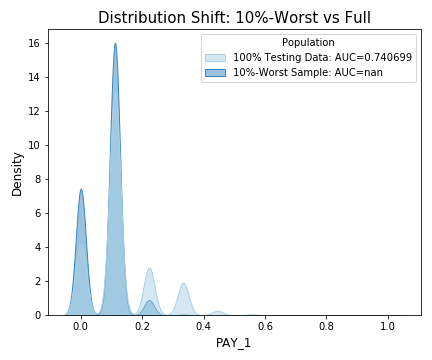

In [34]:
exp.model_diagnose(model='ReLU-DNN', show='resilience_shift_density', show_feature='PAY_1', alpha=0.1, figsize=(6, 5))

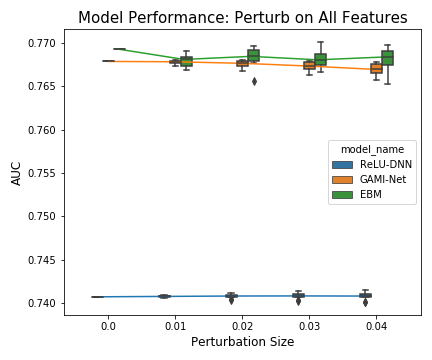

In [35]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf', perturb_size=0.01, figsize=(6, 5))

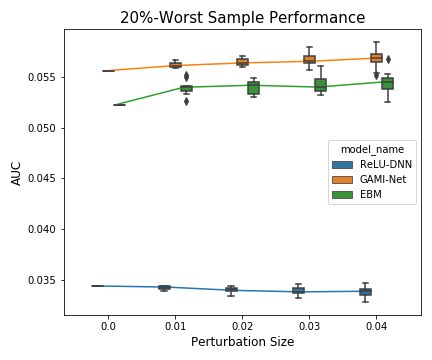

In [36]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='robustness_perf_worst', 
                  perturb_size=0.01, alpha=0.2, figsize=(6, 5))

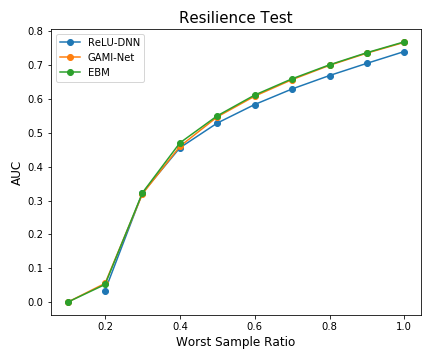

In [37]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_perf', figsize=(6, 5))

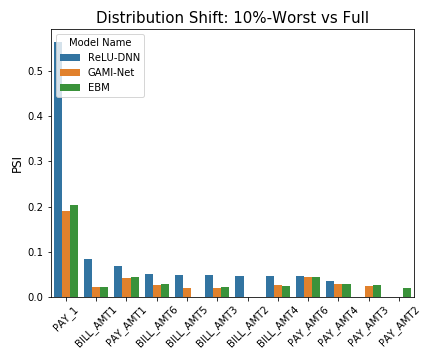

In [38]:
exp.model_compare(models=['ReLU-DNN', 'GAMI-Net', 'EBM'], show='resilience_distance', figsize=(6, 5))